In [1]:
%pylab inline
execfile("myhelpers.py")

Populating the interactive namespace from numpy and matplotlib


/home/bkasap/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#set plot attributes
fig_width = 5  # width in inches
fig_height = 3  # height in inches
fig_size =  [fig_width,fig_height]

fig_width_pt = 300                      # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/96                  # Convert pt to inch
golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
#fig_height = fig_width*0.35            # height in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'Agg',
          'axes.labelsize': 6.5,
          'axes.titlesize': 6.5,
          #'font.size': 6.5,
          'xtick.labelsize': 5.5,
          'ytick.labelsize': 5.5,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'figure.figsize': fig_size,
          'savefig.dpi' : 600,
          'font.family': 'sans-serif',
          'axes.linewidth' : 0.5,
          'xtick.major.size' : 1.5,
          'ytick.major.size' : 1.5,
          'font.size' : 8,
          'figure.autolayout' : False,
          'legend.fontsize': 6,
          #'legend.linewidth': 1,
          'legend.numpoints': 1,
          'legend.fancybox': True}

rcParams.update(params)

### Plot spike count of the population

In [3]:
amp = 21
amp2 = 0
direction = 0
direction2 = 0
delay = 0
I = 150
I2 = 0
mic = 1

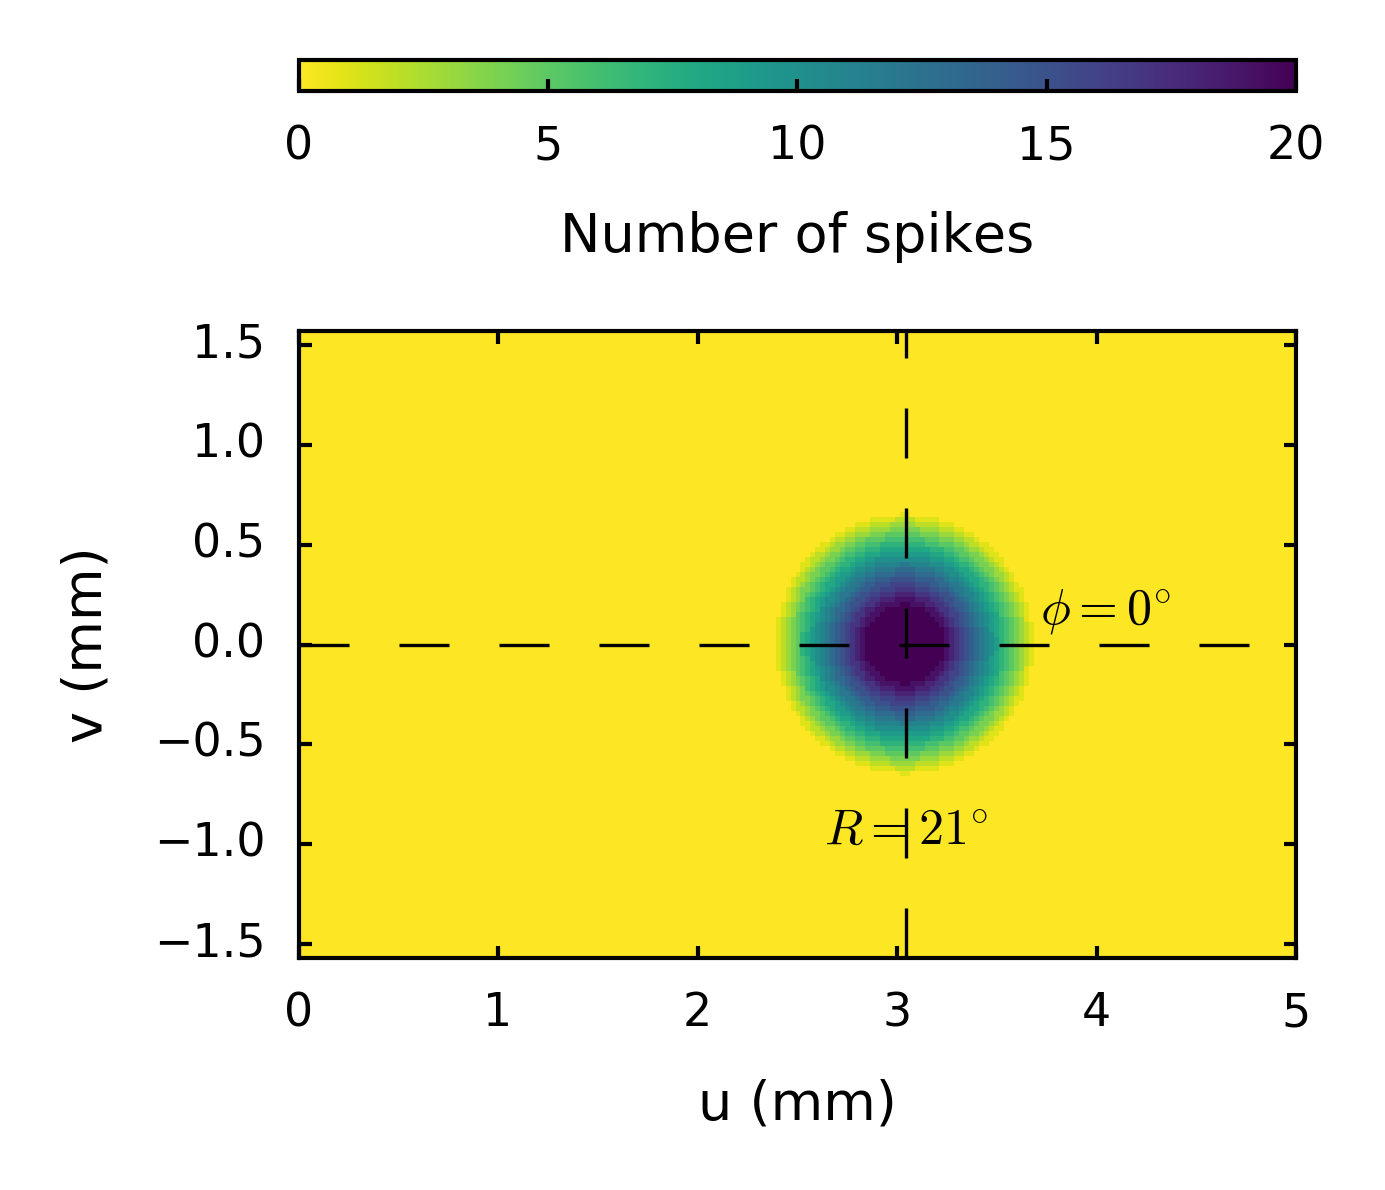

In [4]:
dur=100
    
filenamebase = 'run/lat_1_inp_'+str(I)+'_inp2_'+str(I2)+'_dur_'+str(dur)+'_mic_'+str(mic)+'_amp_'+str(amp)+'_dir_'+str(direction)+'_amp2_'+str(amp2)+'_dir2_'+str(direction2)+'_del_'+str(delay)+'_e_0.4500_i_0.1400_'
filenamebasetune = 'run/lat_1_inp_150_inp2_0_dur_100_mic_1_amp_21_dir_0_amp2_0_dir2_0_del_0_e_0.4500_i_0.1400_'

fig = figure(figsize=fig_size)
neuron = p.read_csv(filenamebase+"neuroninfo.csv", ' ')
spikes = p.read_csv(filenamebase+"spiketimes.csv", ' ')
neuron = neuron.values
spikes = spikes.values

numspks=np.copy(neuron[1:,4])

nspks = numspks.reshape((201,201))

u = log(amp)
v = deg2rad(direction)

u2 = log(amp2)
v2 = deg2rad(direction2)

ccid1 = neuron[0,0]
ccid = ccid1

dist1 = distance(neuron[:,1], neuron[:,2], u, v)
dist2 = distance(neuron[:,1], neuron[:,2], u2, v2)
ccid2 = find(dist2==min(dist2))[0]

stcent = getspiketrain(spikes, ccid)
stcent2 = getspiketrain(spikes, ccid2)

if len(stcent2)>=len(stcent):
    ccid = ccid2
    stcent = stcent2
    
(ver, hor) = divmod(ccid, 201)

im = imshow(nspks, interpolation='nearest', origin='lower', extent=[0, 5, -2.5, 2.5], cmap='viridis_r', vmin=0, vmax=20)
plot([u, u], [-pi/2, pi/2], '--k', lw=0.4)
plot([0, 5], [v, v], '--k', lw=0.4)
text(u, v-1., r'$R = '+str(amp)+r'^{\circ}$', horizontalalignment='center', fontsize=6)
text(u+1, v+0.1, r'$\phi = '+str(direction)+'^{\circ}$', horizontalalignment='center', fontsize=6)

ylim(-pi/2, pi/2)
xlabel('u (mm)')
ylabel('v (mm)')

divider = make_axes_locatable(gca())
cax = divider.append_axes('top', size='5%', pad=0.4)

cb = plt.colorbar(im, cax=cax, ticks=[0, 5, 10, 15, 20], orientation='horizontal')
cb.set_label('Number of spikes')
cb.ax.set_xticklabels([0, 5, 10, 15, 20], rotation='horizontal')

### Plot firing rates of the population

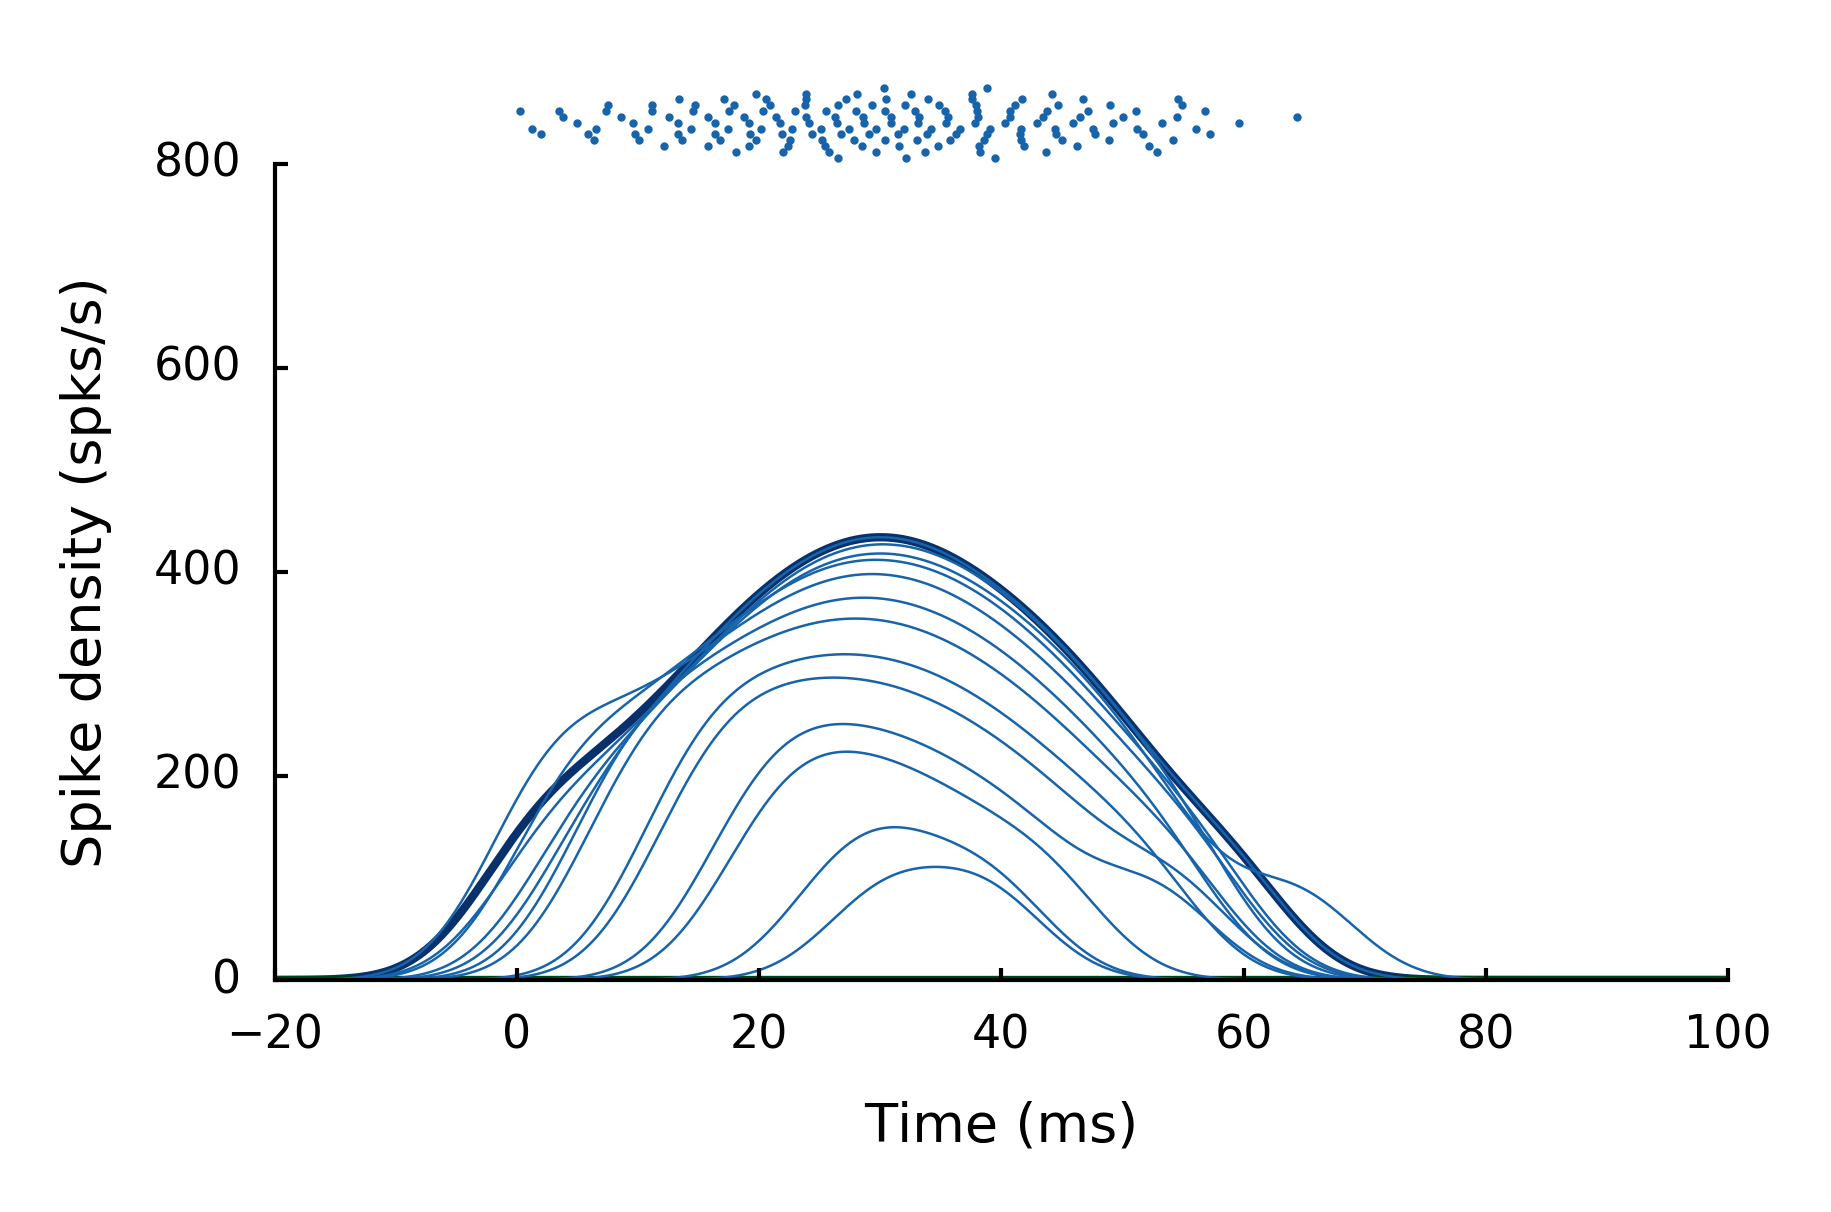

In [5]:
#step size between neurons to plot the firing rate
neuronshor1 = ccid1+4*arange(-21, 20)
neuronsver1 = ccid1+804*arange(-21, 20)

neuronshor2 = ccid2+4*arange(-21, 20)
neuronsver2 = ccid2+804*arange(-21, 20)

stcent1 = getspiketrain(spikes, ccid1)
stcent2 = getspiketrain(spikes, ccid2)
stcent = getspiketrain(spikes, ccid)
start = stcent[0]

centfr1 = frate(stcent1)
plot(np.linspace(0, len(centfr1)/100, len(centfr1))-start, centfr1, color=colorpic1(1.), lw=1.)
centfr2 = frate(stcent2)
plot(np.linspace(0, len(centfr2)/100, len(centfr2))-start, centfr2, color=colorpic2(1.), lw=1.)

ax = gca()
divider = make_axes_locatable(ax)
axsp = divider.append_axes('top', size='10%', pad=0, sharex=ax)
if amp!=amp2:
    for i, nid in enumerate(neuronshor1):
        st = getspiketrain(spikes, nid)

        st = st[st>start]

        firing = frate(st)
        ax.plot(np.linspace(0, len(firing)/100, len(firing))-start, firing, color=colorpic1(0.8), lw=0.3)
        axsp.plot(st-start, np.ones(len(st))*400+i*5, '.', ms=1, color=colorpic1(0.8))

    for i, nid in enumerate(neuronshor2):
        st = getspiketrain(spikes, nid)

        st = st[st>start]

        firing = frate(st)
        ax.plot(np.linspace(0, len(firing)/100, len(firing))-start, firing, color=colorpic2(0.8), lw=0.3)
        axsp.plot(st-start, np.ones(len(st))*400+i*5, '.', ms=1, color=colorpic1(0.8))
        
if direction!=direction2:
    for i, nid in enumerate(neuronsver1):
        st = getspiketrain(spikes, nid)

        st = st[st>start]

        firing = frate(st)
        ax.plot(np.linspace(0, len(firing)/100, len(firing))-start, firing, color=colorpic1(0.8), lw=0.3)
        axsp.plot(st-start, np.ones(len(st))*400+i*5, '.', ms=1, color=colorpic1(0.8))

    for i, nid in enumerate(neuronsver2):
        st = getspiketrain(spikes, nid)

        st = st[st>start]

        firing = frate(st)
        ax.plot(np.linspace(0, len(firing)/100, len(firing))-start, firing, color=colorpic2(0.8), lw=0.3)
        axsp.plot(st-start, np.ones(len(st))*400+i*5, '.', ms=1, color=colorpic1(0.8))

x1 = 0
x2 = 80

ax.set_xlim((x1-20), (x2+20))
ax.set_ylim(0, 800)

simpleaxis(ax)
axsp.axis('off')

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Spike density (spks/s)')
ax.set_yticks([0, 200, 400, 600, 800])

### Plot Eye Displacement

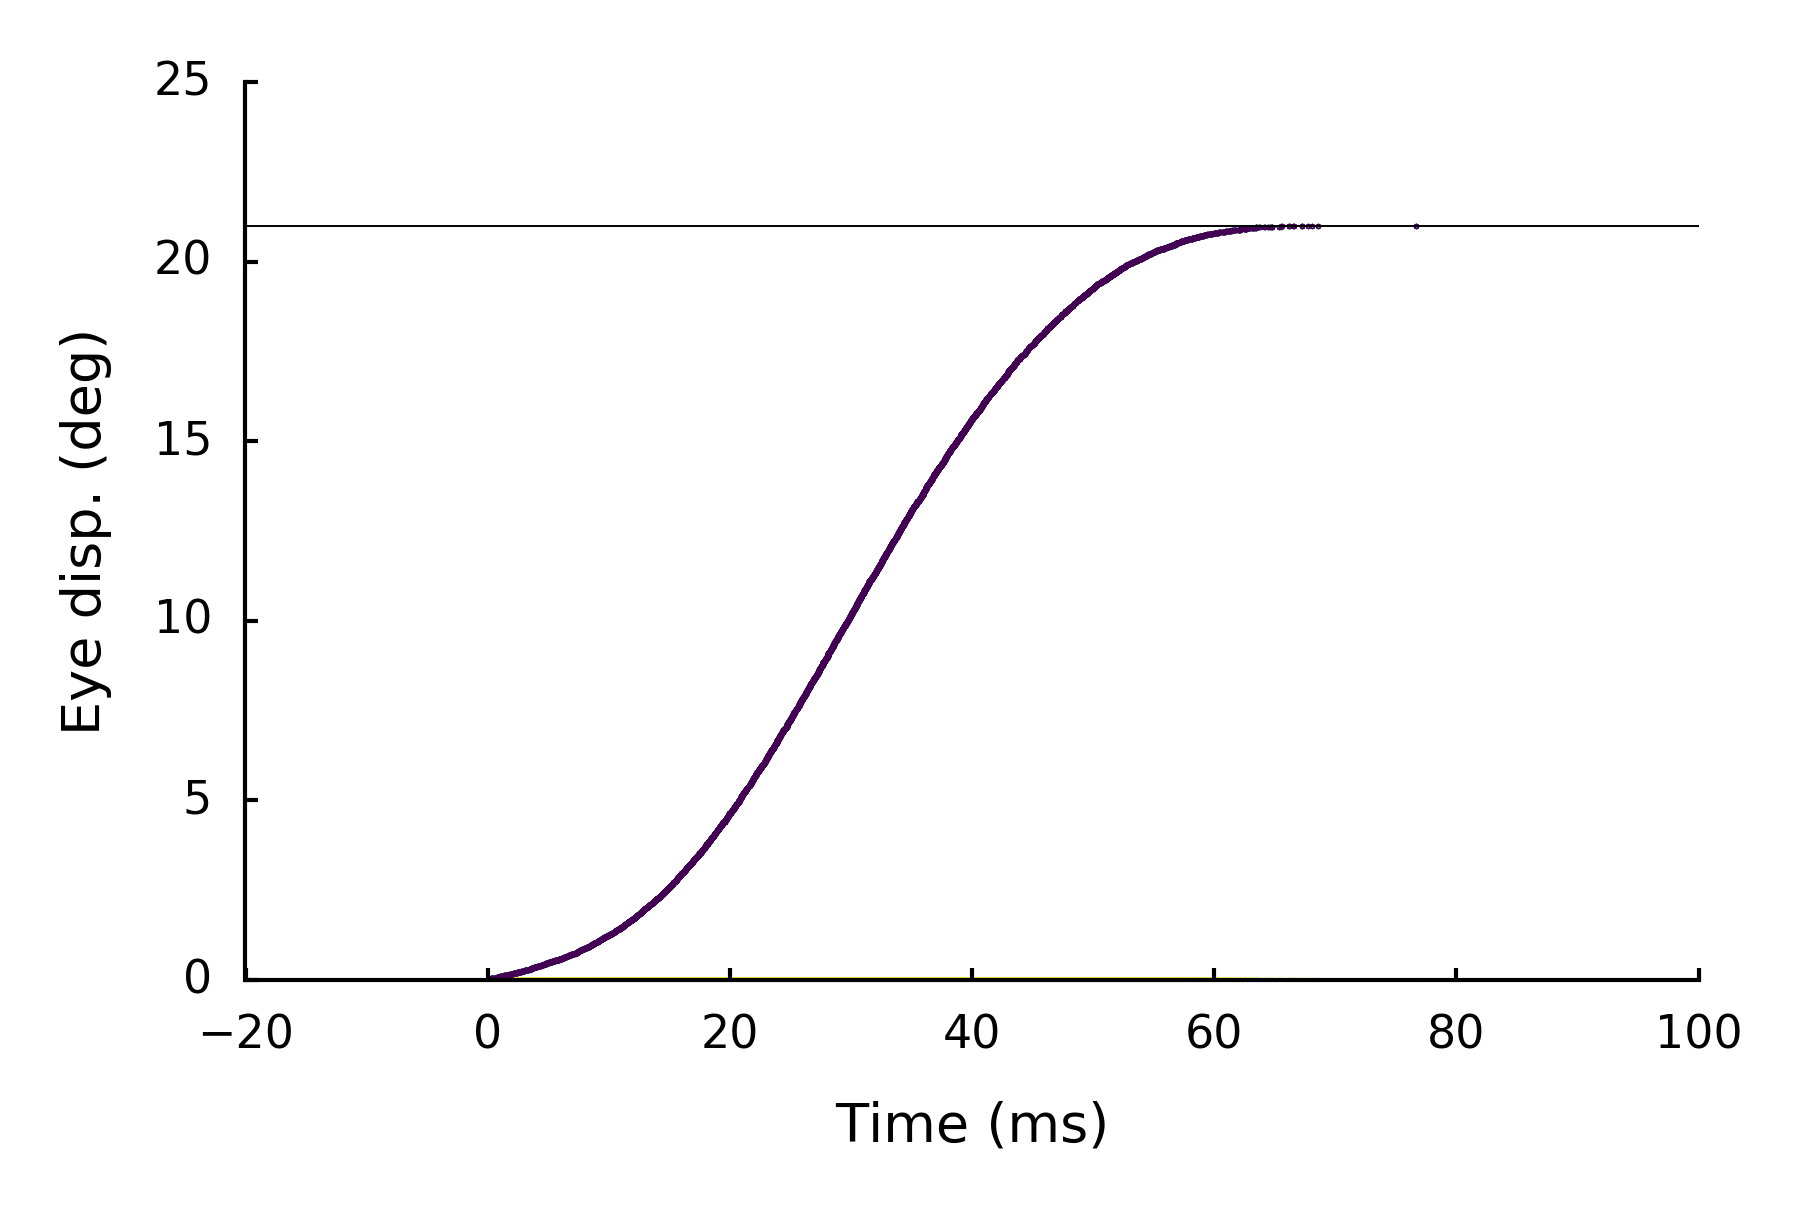

In [6]:
x1 = 0
x2 = 80

time, hor, ver = eyetrace(filenamebasetune)
k = 21*cos(deg2rad(0))/cumsum(hor)[-1]

time, hor, ver = eyetrace(filenamebase)
disp = sqrt((k*cumsum(hor))**2 + (k*cumsum(ver))**2)

plot(time-start, k*cumsum(hor), '.', color=colorpic3(0.5), ms=0.3)
plot(time-start, k*cumsum(ver), '.', color=colorpic3(1.), ms=0.3)
plot(time-start, disp, '.', color=colorpic3(0.), ms=0.3)

plot([x1-20, x2+20], [k*cumsum(hor)[-1], k*cumsum(hor)[-1]], 'k', lw=0.2)
plot([x1-20, x2+20], [k*cumsum(ver)[-1], k*cumsum(ver)[-1]], 'k', lw=0.2)
plot([x1-20, x2+20], [disp[-1], disp[-1]], 'k', lw=0.2)

gca().set_xlim((x1-20), (x2+20))
gca().set_ylim(0)
simpleaxis(gca())


gca().set_xlabel('Time (ms)')
gca().set_ylabel('Eye disp. (deg)')

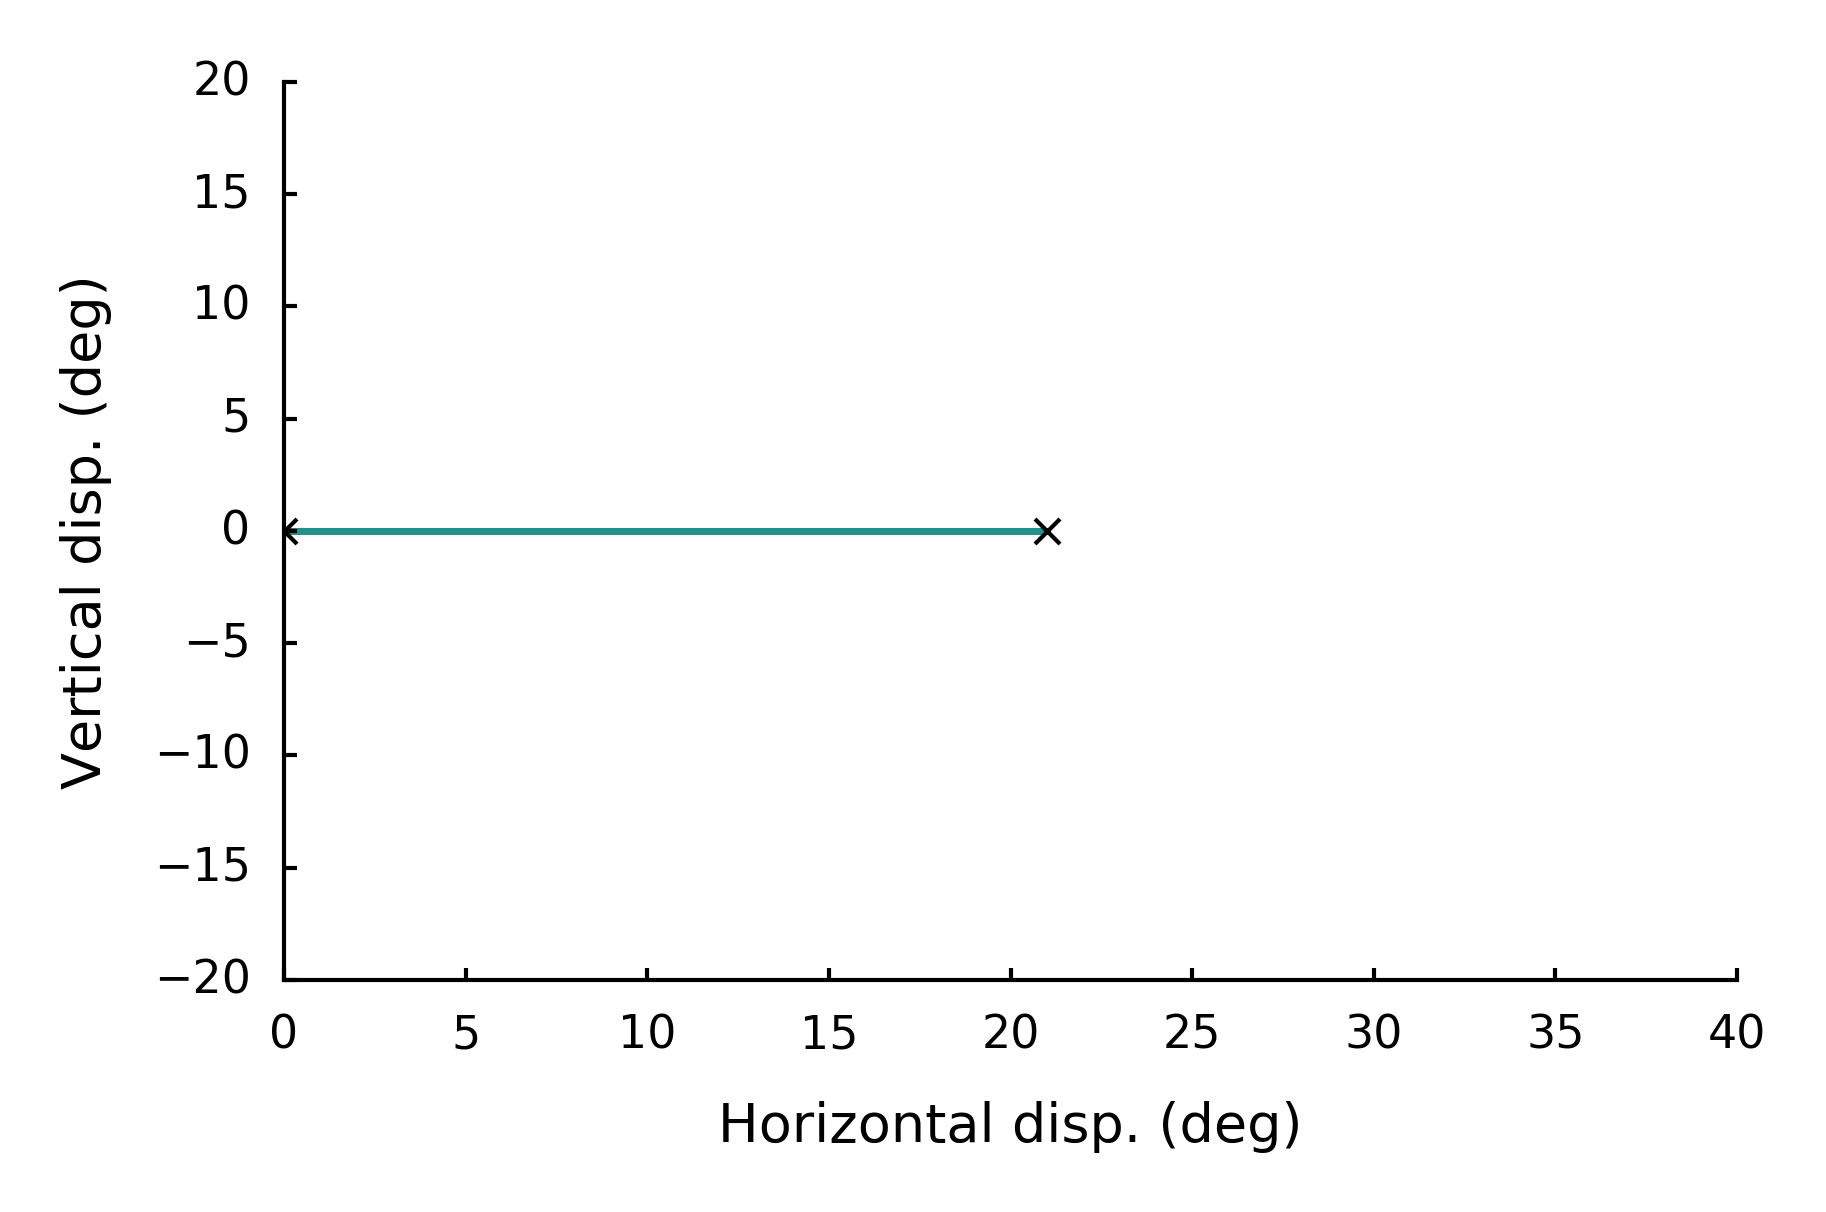

In [7]:
plot(k*cumsum(hor), k*cumsum(ver), '.', color=colorpic3(0.5), ms=0.3)
plot(amp*cos(deg2rad(direction)), amp*sin(deg2rad(direction)), 'xk', ms=3)
plot(amp2*cos(deg2rad(direction2)), amp2*sin(deg2rad(direction2)), 'xk', ms=3)

gca().set_ylim(-20,20)
gca().set_xlim(0,40)

gca().set_xlabel('Horizontal disp. (deg)')
gca().set_ylabel('Vertical disp. (deg)')
simpleaxis(gca())
